#### 2.3.1. Загрузка данных и первичный осмотр

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("S02-hw-dataset.csv")

In [4]:
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB


In [6]:
df.describe()

,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


#### 2.3.2. Пропуски, дубликаты и базовый контроль качества

In [7]:
df.isna().mean()

user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [9]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40     True
dtype: bool

In [11]:
df[(df["age"] < 0) | (df["purchases"] < 0) | (df["revenue"] < 0)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [12]:
df[(df["age"] > 100)]

,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


In [18]:
df[(df["age"] < 14)]

,user_id,age,country,purchases,revenue
20,21,5.0,RU,8,1488


In [14]:
df[(df["revenue"] == 0) & (df["purchases"] > 0)]

,user_id,age,country,purchases,revenue
10,11,24.0,US,4,0


In [15]:
df[(df["purchases"] == 0) & (df["revenue"] > 0)]

,user_id,age,country,purchases,revenue


##### Проблемы качества данных 

1) Пропуски в столбцах
2) Есть полностью дублирующая строка (10,24,RU,7,511) 
3) Обнаружено отрицательное значение (-1)
4) Нереалистичный возраст (120 лет)
5) Обнаружено логическое противоречие - 4 покупки при нулевом доход

#### 2.3.3. Базовый EDA: группировки, агрегаты и частоты

In [20]:
df.value_counts("country")

country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [29]:
df.groupby("country").agg({
    "user_id": "count",
    "age": "mean",
    "purchases": ["mean", "sum"],
    "revenue": ["mean", "sum"]}).round(1)

user_id   age purchases     revenue       
          count  mean      mean sum    mean    sum
country                                           
CN            2  24.0       4.5   9  1054.0   2108
DE            6  34.6       6.5  39  1445.5   8673
FR           12  46.2       4.2  51   675.9   8111
RU           13  30.1       4.8  62   790.1  10271
US            8  36.7       4.6  37   557.4   4459

##### Основные наблюдения

Доминирует категория RU, которая лидирует по кол-ву пользователей, сумме покупок и дохода. При этом уступает по среднему доходу и среднему кол-ву покупок на пользователя. Обнаружен неожиданный эффект: у категории DE наибольший средний доход среди всех стран.

####  2.4 Визуализация данных в Matplotlib

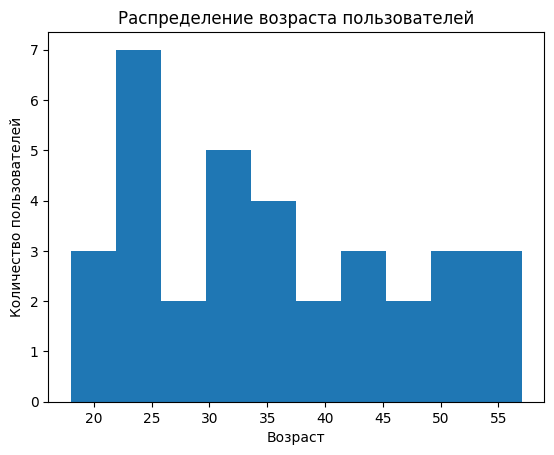

In [61]:
df_clean = df[(df["purchases"] > 0) & (df["age"].between(10, 100))]
plt.figure()
plt.hist(df_clean["age"], bins=10)
plt.xlabel("Возраст")
plt.ylabel("Количество пользователей")
plt.title("Распределение возраста пользователей")

plt.savefig("./figures/age_historam.png")

Распределение возраста смещено к 20-40 годам.

Text(0.5, 1.0, 'Boxplot выручки')

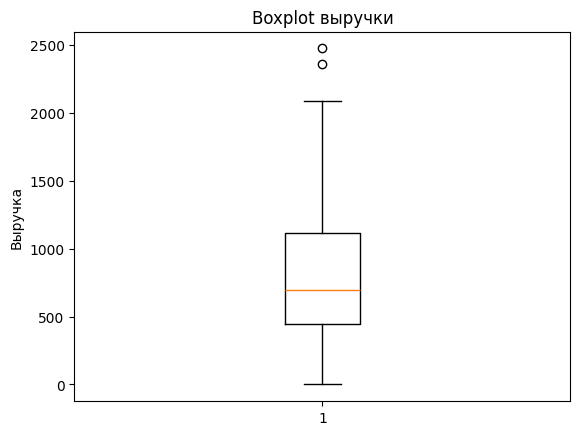

In [63]:
plt.figure()
plt.boxplot(df_clean["revenue"])
plt.ylabel("Выручка")
plt.title("Boxplot выручки")

Выручка распределена неравномерно: большая часть значений находится в нижней части, но есть заметные высокие значения.

Text(0.5, 1.0, 'Зависимость выручки от числа покупок')

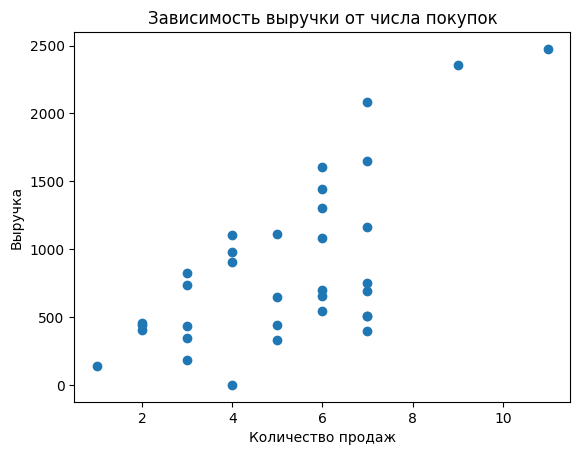

In [62]:
plt.figure()
plt.scatter(df_clean["purchases"], df_clean["revenue"])
plt.xlabel("Количество продаж")
plt.ylabel("Выручка")
plt.title("Зависимость выручки от числа покупок")

Видна линейная зависимость, больше покупок - выше доход.